In [1]:
%matplotlib inline

# NOW one basic example on  using PCA on Tabular-IRIS data 


adapted from: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

In [41]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
np.random.seed(5)

iris = datasets.load_iris()
target_names = iris.target_names
iris.data.shape


(150, 4)

explained variance ratio (first two components): [0.92461872 0.05306648]


Text(0.5, 1.0, 'PCA of IRIS dataset')

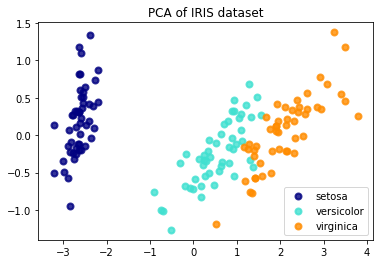

In [40]:

X = iris.data
X.shape
y_r = iris.target

pca = decomposition.PCA(n_components=2)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y_r == i, 0], X_r[y_r == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

explained variance ratio (first two components): [0.92461872 0.05306648 0.01710261]


Text(0.5, 0, 'PC3')

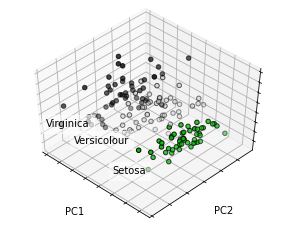

In [29]:
X = iris.data
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
y = iris.target

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))


centers = [[1, 1], [-1, -1], [1, -1]]
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')


# Faces recognition example using eigenfaces and SVMs


The dataset used in this example is a preprocessed of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)




This is adpated from: 



*   https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html



In [30]:
for name in dir():
    if not name.startswith('_'):
        del globals()[name]
        

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
print(__doc__)


Automatically created module for IPython interactive environment


In [31]:
from sklearn.datasets import fetch_lfw_people

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)



Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [32]:

# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [37]:
# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

# Percentage of variance explained for each components
print('explained variance ratio (first 150 components): %s'
      % str(pca.explained_variance_ratio_))



Extracting the top 150 eigenfaces from 966 faces
done in 0.219s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.024s
explained variance ratio (first two components): [0.19346529 0.15116832 0.07083682 0.05951801 0.0515749  0.02887156
 0.02514488 0.02176467 0.02019381 0.01902125 0.01682215 0.01580599
 0.01223364 0.01087937 0.01064452 0.00979653 0.00892398 0.00854844
 0.0083571  0.00722636 0.00696569 0.00653857 0.00639558 0.00561317
 0.00531107 0.00520152 0.00507466 0.00484209 0.00443588 0.00417829
 0.00393704 0.00381728 0.00356061 0.00351201 0.00334556 0.00329931
 0.00314626 0.00296217 0.00290135 0.00284722 0.00280004 0.00267556
 0.00259901 0.00258401 0.00240919 0.00238994 0.00235403 0.00222587
 0.00217507 0.00216566 0.00209064 0.00205426 0.00200421 0.00197395
 0.0019383  0.00188764 0.00180173 0.00178897 0.00174819 0.00173054
 0.00165647 0.00162947 0.00157409 0.00153429 0.00149965 0.00147262
 0.00143931 0.00141882 0.00139697 0.00138147 0.00134005 0.00133168
 0.001

In [34]:
# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))



Fitting the classifier to the training set
done in 46.173s
Best estimator found by grid search:
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.005,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.077s
                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.46      0.57        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.95      0.67      0.78        27
    George W Bush       0.83      0.98      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.97      0.78      0.86        36

         accuracy                           0.85       322
        macro avg       0.89      0.73      0.79       32

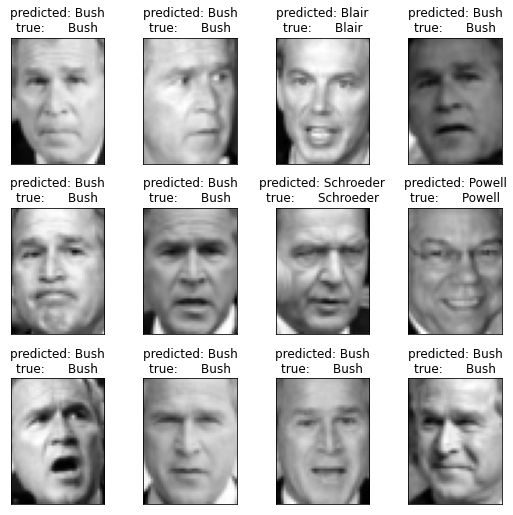

In [36]:

# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)



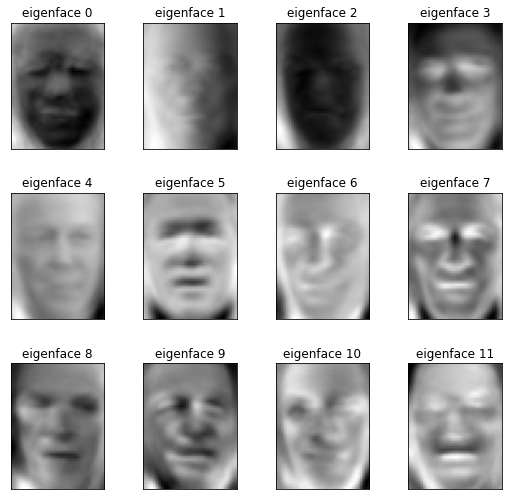

In [24]:
# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()